In [12]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [13]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

## Generate target function and its noisy version.

In [14]:
# Sets the number of examples.
N = 20

# Attribute.
x = np.sort(3*np.random.rand(N, 1), axis=0)

# Target function.
y = 1 + 0.5*x

# Noisy function.
y_noisy = y + np.random.randn(N, 1)/1.5

Ntest = 100
x_test = np.linspace(0, 3, Ntest).reshape(Ntest, 1)
y_test = 1 + 0.5*x_test + np.random.randn(Ntest, 1)/1.5

In [15]:
print('Valor médio:', np.mean(y_noisy))

Valor médio: 1.5046773482442675


## Define the polinomial order

In [18]:
# Polynomial order.
model_order = 10

## Define the regularization factor

In [19]:
# Regularization factor.
lambdas = [0, 1e-5, 3.15*10**-2, 0.3, 1]

## SciKit-Learn solution

Lambda: 0.0000e+00:
[1.50467735]
[ 1.20259193e+02 -2.89207009e+03  2.96777591e+04 -1.65681150e+05
  5.55066651e+05 -1.16464184e+06  1.54152762e+06 -1.24951698e+06
  5.66116717e+05 -1.09776151e+05]
---------------------------------------------
Lambda: 1.0000e-05:
[1.50467735]
[ 0.57288079 -0.00999171 -0.01538632 -0.01769534 -0.01660177 -0.01419888
 -0.01163787 -0.00936973 -0.00751619 -0.00606764]
---------------------------------------------
Lambda: 3.1500e-02:
[1.50467735]
[ 0.49174422  0.          0.          0.         -0.         -0.
 -0.         -0.         -0.00773711 -0.00664474]
---------------------------------------------
Lambda: 3.0000e-01:
[1.50467735]
[0.21637224 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
---------------------------------------------
Lambda: 1.0000e+00:
[1.50467735]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
---------------------------------------------


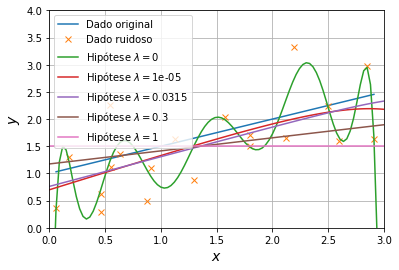

In [20]:
include_bias = True

# Plot original data versus noisy version.
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
for i in range(0,len(lambdas)):

    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    std_scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x, y_noisy)
    # Print coefs
    print('Lambda: %1.4e:' % (lambdas[i]))
    print(model.named_steps['reg'].intercept_)
    if lambdas[i] > 0:
        print(model.named_steps['reg'].coef_[1:model_order+1])
    else:
        print(model.named_steps['reg'].coef_[0, 1:model_order+1])
    print('---------------------------------------------')
    # Predict.
    y_test_regul = model.predict(x_test)
    # Plot prediction.
    plt.plot(x_test, y_test_regul, label='Hipótese $\lambda=$'+str(lambdas[i]))
    
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.axis([0, 3, 0, 4])
# Save figure
plt.savefig("lasso_regression.png", dpi=600)
#Show the plot.
plt.show()

In [21]:
include_bias = True

M = 5000
lambdas = np.linspace(1e-5,1, M)

a_hist = np.zeros((model_order, M))
norm_hist = np.zeros((1, M))
error_test = []

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    std_scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x, y_noisy)
    a = model.named_steps['reg'].coef_[1:model_order+1]
    a_hist[:,i] = a
    norm_hist[:,i] = np.linalg.norm(a, ord=1)
    # Predict.
    y_test_regul = model.predict(x_test)
    error_test.append((mean_squared_error(y_test, y_test_regul)))

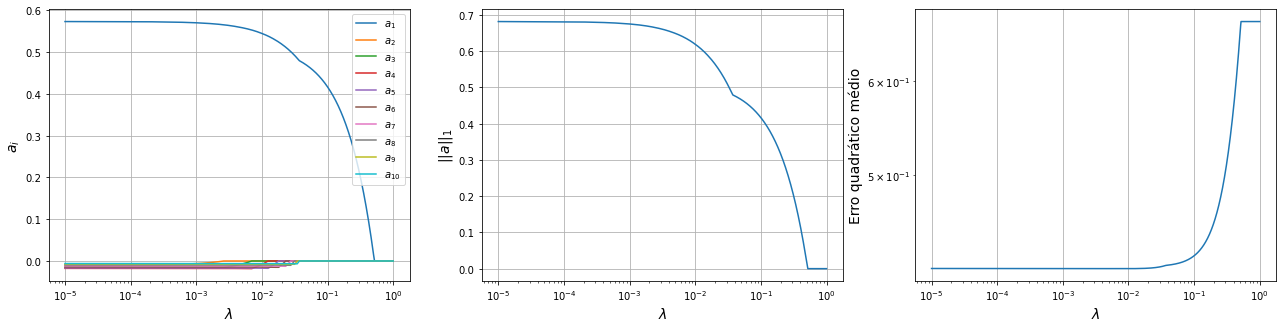

In [22]:
# Create figure.
fig = plt.figure(figsize=(22,5))

# Plot weight.
ax = plt.subplot(1, 3, 1)
for i in range(0,model_order): 
    plt.plot(lambdas, a_hist[i,:], label='$a_{'+str(i+1)+'}$')
plt.xscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('$a_i$', fontsize=14)
plt.legend(loc='upper right')
plt.grid()
# Save figure
#plt.savefig("lasso_regression_pesos.png", dpi=600)

# Plot norm.
ax = plt.subplot(1, 3, 2)
plt.plot(lambdas, norm_hist[0,:])
plt.xscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('$||a||_1$', fontsize=14)
plt.grid()
# Save figure
#plt.savefig("lasso_regression_norma.png", dpi=600)

# Plot error.
ax = plt.subplot(1, 3, 3)
plt.plot(lambdas, error_test)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('Erro quadrático médio', fontsize=14)
plt.grid()
# Save figure
#plt.savefig("lasso_regression_mse.png", dpi=600)

#Show the plot.
plt.show()

Valores pequenos de $\lambda$ até $1\times10^{-2}$ fazem com que modelo fique próximo da função geradora, após isso, o modelo tende ao valor constante igual à média dos dados de treinamento, o que faz o erro aumentar.

In [23]:
for i in range(0, M):
    print('lambda %1.2e: %1.2e, %1.2e, %1.2e, %1.2e, %1.2e' % (lambdas[i],a_hist[0,i],a_hist[1,i],a_hist[2,i],a_hist[3,i],a_hist[4,i]))

lambda 1.00e-05: 5.73e-01, -9.99e-03, -1.54e-02, -1.77e-02, -1.66e-02
lambda 2.10e-04: 5.72e-01, -9.23e-03, -1.54e-02, -1.77e-02, -1.66e-02
lambda 4.10e-04: 5.72e-01, -8.46e-03, -1.54e-02, -1.77e-02, -1.66e-02
lambda 6.10e-04: 5.71e-01, -7.70e-03, -1.55e-02, -1.77e-02, -1.66e-02
lambda 8.10e-04: 5.70e-01, -6.93e-03, -1.55e-02, -1.77e-02, -1.66e-02
lambda 1.01e-03: 5.70e-01, -6.17e-03, -1.55e-02, -1.77e-02, -1.66e-02
lambda 1.21e-03: 5.69e-01, -5.41e-03, -1.55e-02, -1.77e-02, -1.66e-02
lambda 1.41e-03: 5.69e-01, -4.64e-03, -1.56e-02, -1.78e-02, -1.66e-02
lambda 1.61e-03: 5.68e-01, -3.88e-03, -1.56e-02, -1.78e-02, -1.66e-02
lambda 1.81e-03: 5.68e-01, -3.11e-03, -1.56e-02, -1.78e-02, -1.66e-02
lambda 2.01e-03: 5.67e-01, -2.35e-03, -1.56e-02, -1.78e-02, -1.66e-02
lambda 2.21e-03: 5.66e-01, -1.59e-03, -1.56e-02, -1.78e-02, -1.66e-02
lambda 2.41e-03: 5.66e-01, -8.22e-04, -1.57e-02, -1.78e-02, -1.66e-02
lambda 2.61e-03: 5.65e-01, -5.73e-05, -1.57e-02, -1.78e-02, -1.66e-02
lambda 2.81e-03: 5.6

lambda 2.59e-01: 2.57e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.60e-01: 2.57e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.60e-01: 2.57e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.60e-01: 2.56e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.60e-01: 2.56e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.60e-01: 2.56e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.61e-01: 2.56e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.61e-01: 2.56e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.61e-01: 2.55e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.61e-01: 2.55e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.61e-01: 2.55e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.62e-01: 2.55e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.62e-01: 2.55e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.62e-01: 2.54e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.62e-01: 2.54e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 2.6

lambda 4.59e-01: 5.71e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.59e-01: 5.69e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.60e-01: 5.67e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.60e-01: 5.65e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.60e-01: 5.63e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.60e-01: 5.61e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.60e-01: 5.59e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.61e-01: 5.57e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.61e-01: 5.55e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.61e-01: 5.53e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.61e-01: 5.51e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.61e-01: 5.49e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.62e-01: 5.47e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.62e-01: 5.45e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.62e-01: 5.43e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 4.6

lambda 7.10e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.10e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.10e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.10e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.11e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.11e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.11e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.11e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.11e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.12e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.12e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.12e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.12e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.12e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.13e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 7.1

lambda 9.59e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.59e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.60e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.60e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.60e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.60e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.60e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.61e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.61e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.61e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.61e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.61e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.62e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.62e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.62e-01: 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00
lambda 9.6

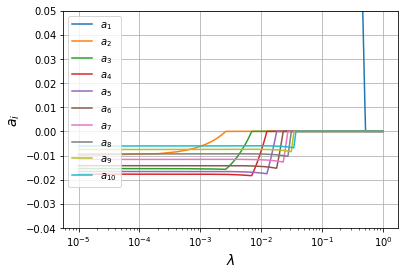

In [24]:
# Plot weight.
for i in range(0,model_order): 
    plt.plot(lambdas, a_hist[i,:], label='$a_{'+str(i+1)+'}$')
plt.xscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('$a_i$', fontsize=14)
plt.legend(loc='upper left')
plt.ylim([-0.04, 0.05])
plt.grid()
#Show the plot.
plt.show()